In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
import keras 

# List all available physical devices
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"TensorFlow is using GPU: {physical_devices}")
else:
    print("TensorFlow is not using a GPU.")

TensorFlow is using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import geopandas as gpd
from shapely.geometry import Point

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

In [6]:
# Load from JSON file
with open("../data/species_universe_filtered_10.json", "r") as file:
    species_universe = json.load(file)
label_encoder = LabelEncoder()
label_encoder.fit(list(species_universe.keys()))
# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)
for species, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{species}: {encoded_label}")
    break

Abies alba: 0


In [7]:
with open("../data/Full_Scale/10_filtered_vectorized_gbif_assemblages_climatic_1991-2018_32.pkl", "rb") as file:
    df = pickle.load(file)
df

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
1,79231,2011,"[Angelica archangelica, Dactylorhiza majalis, ...",5.172939,59.201189,"[[[0.5050869, 0.0, 0.0, 0.0, 0.7999878, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,79231,2012,"[Carex distans, Euphrasia foulaensis, Carex ot...",5.172939,59.201189,"[[[0.709527, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,79231,2014,"[Lysimachia europaea, Ficaria verna, Juncus ar...",5.172939,59.201189,"[[[0.6718502, 0.0, 0.0, 0.0, 0.83332443, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,79231,2015,"[Tripolium pannonicum, Centaurium littorale, P...",5.172939,59.201189,"[[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,79231,2016,"[Lysimachia europaea, Lythrum salicaria, Vacci...",5.172939,59.201189,"[[[0.91899633, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71740,1818627,2012,"[Avenella flexuosa, Lathyrus japonicus, Honcke...",30.835603,69.774990,"[[[0.6059245, 0.5373939, 0.49581122, 0.4746435...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71741,1818627,2017,"[Luzula spicata, Antennaria dioica, Cochlearia...",30.835603,69.774990,"[[[0.61264133, 0.53604275, 0.47785866, 0.41814...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71742,1820117,1994,"[Honckenya peploides, Alnus incana, Epilobium ...",30.847255,69.755439,"[[[0.6806042, 0.6014411, 0.50048757, 0.4638896...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71743,1821608,1994,"[Taraxacum spectabile, Astragalus norvegicus, ...",30.865522,69.744514,"[[[0.69237506, 0.60102916, 0.49402428, 0.45421...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
# Convert species vectors to a NumPy array and sum along axis 0 (columns)
class_counts = np.sum(np.stack(df['species_vector'].values), axis=0)

# Convert to dictionary format {class_index: count}
class_counts_dict = {i: int(count) for i, count in enumerate(class_counts)}

print(class_counts_dict)

{0: 2309, 1: 515, 2: 668, 3: 156, 4: 706, 5: 50, 6: 4153, 7: 204, 8: 24, 9: 130, 10: 12, 11: 46, 12: 41, 13: 13, 14: 14, 15: 763, 16: 12, 17: 53, 18: 33, 19: 10, 20: 15, 21: 153, 22: 220, 23: 104, 24: 37, 25: 398, 26: 167, 27: 204, 28: 12460, 29: 23, 30: 1275, 31: 108, 32: 6012, 33: 164, 34: 55, 35: 61, 36: 78, 37: 2033, 38: 1156, 39: 22, 40: 3707, 41: 1008, 42: 4328, 43: 28, 44: 40, 45: 61, 46: 1209, 47: 20, 48: 103, 49: 1451, 50: 27, 51: 993, 52: 66, 53: 34, 54: 905, 55: 41, 56: 162, 57: 16, 58: 67, 59: 67, 60: 125, 61: 1430, 62: 80, 63: 16, 64: 882, 65: 12, 66: 973, 67: 26, 68: 232, 69: 40, 70: 23, 71: 68, 72: 709, 73: 22, 74: 44, 75: 409, 76: 162, 77: 436, 78: 462, 79: 756, 80: 15, 81: 97, 82: 27, 83: 111, 84: 24, 85: 27, 86: 18, 87: 79, 88: 109, 89: 2363, 90: 94, 91: 973, 92: 18, 93: 1522, 94: 1873, 95: 127, 96: 513, 97: 1192, 98: 18, 99: 11, 100: 15, 101: 275, 102: 23, 103: 3157, 104: 2504, 105: 3524, 106: 18, 107: 10, 108: 21, 109: 58, 110: 2349, 111: 1086, 112: 1502, 113: 33, 1

In [9]:
type(df.iloc[0].climatic_map),type(df.iloc[0].species_vector),type(df.iloc[0].species)
# df.iloc[0].climatic_map ya esta en float32
df.iloc[0].species_vector

array([0, 0, 0, ..., 0, 0, 0])

### Training Splits

In [10]:
# train_df, temp_df = train_test_split(df_sampled, test_size=0.3, random_state=42, shuffle = True)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, shuffle = True)

# Now, split the temporary data into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle = True)

### Tensorflow Dataset

In [11]:
import os
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
# Assuming `df` is your pandas DataFrame containing 'climatic_map' and 'species_vector'
# df = ...  # Your DataFrame

def create_tf_dataset(df, batch_size=32):
    # Convert 'climatic_map' and 'species_vector' columns to numpy arrays
    climatic_maps = np.stack(df['climatic_map'].values).astype(np.float32)  # Shape: (N, H, W, C)
    species_vectors = np.stack(df['species_vector'].values).astype(np.float32)  # Shape: (N, num_species)
    
    # Create a tf.data.Dataset from the numpy arrays
    dataset = tf.data.Dataset.from_tensor_slices((climatic_maps, species_vectors))
    
    # Shuffle, batch, and repeat (for training)
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    
    return dataset

train_dataset = create_tf_dataset(train_df, batch_size=32)
val_dataset = create_tf_dataset(val_df, batch_size=32)
test_dataset = create_tf_dataset(test_df, batch_size=32)
# Iterate through the dataset
for data, label in train_dataset:
    print(data.shape)  # Shape: (batch_size, H, W, C)
    print(label)  # Shape: (batch_size, num_species)

(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 1819), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 1819), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 1819), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 1819), dtype=float32)
(32, 32, 32, 11)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0.

#### Printing Datasets

(32, 32, 11)
Averaged image shape: (32, 32)


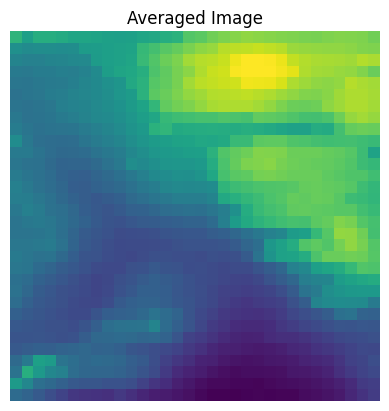

In [12]:
for images, labels in train_dataset.take(1):  # Take the first batch
    image = images[0].numpy()  # Get the first image from the batch and convert to numpy
    print(image.shape)
    # Average across the channels (assuming image shape is (H, W, 11))
    image_avg = image.mean(axis=-1)  # Average along the last axis (channels)

    # Check the shape of the averaged image (should be H, W)
    print("Averaged image shape:", image_avg.shape)

    # Plot the averaged image
    plt.imshow(image_avg, cmap='viridis')  # You can change the colormap if needed
    plt.title("Averaged Image")
    plt.axis('off')
    plt.show()

### Set seed

In [13]:
tf.keras.utils.set_random_seed(42)

### Functions

In [14]:
class CustomLoss(tf.keras.losses.Loss):
    def __init__(self, loss_fn, args, weighted=True):
        super().__init__()
        self.loss_fn = loss_fn
        self.weighted = weighted
        self.args = args
        if self.weighted:
            self.samples_per_cls = args['train_label_cnt']
            self.no_of_classes = args['num_classes']

    def compute_weights(self, labels, beta=0.9999):
        # Effective number of samples per class
        effective_num = 1.0 - np.power(beta, self.samples_per_cls)
        weights = (1.0 - beta) / np.array(effective_num)
        weights = weights / weights.sum() * self.no_of_classes
        
        # Convert to TensorFlow tensor and apply for each batch
        weights = tf.convert_to_tensor(weights, dtype=tf.float32)
        weights = tf.expand_dims(weights, axis=0)
        # Use `tf.shape(labels)[0]` instead of `labels.shape[0]`
        batch_size = tf.shape(labels)[0]
        weights = tf.repeat(weights, batch_size, axis=0) * labels

        return weights
    # here we have to check if we really pass the logits to the loss function or 
    def forward_focal(self, logits, labels, alpha=0.999, gamma=2.0):
        # Sigmoid activation to get probabilities from logits
        p = tf.sigmoid(logits)
        
        # Binary cross-entropy loss (without reduction)
        ce_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
        
        # Compute p_t for focal loss
        p_t = p * labels + (1 - p) * (1 - labels)
        focal_loss = ce_loss * tf.pow(1.0 - p_t, gamma)

        if self.weighted:
            # Compute class weights
            weights = self.compute_weights(labels)
            weights_t = weights * labels * alpha + (1 - labels) * (1 - alpha)
            weighted_loss = weights_t * focal_loss
            return tf.reduce_mean(weighted_loss)
        else:
            # Focal loss without class balancing
            alpha_t = alpha * labels + (1 - alpha) * (1 - labels)
            focal_loss = alpha_t * focal_loss
            return tf.reduce_mean(focal_loss)
    
    def forward_bce(self, logits, labels):
        if self.weighted:
            # Use class weights for BCE loss
            weights = self.compute_weights(labels)
            bce_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
            return tf.reduce_mean(bce_loss * weights)
        else:
            # Simple binary cross-entropy loss
            return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits))
    
    def forward_dice(self, logits, labels):
        p = tf.sigmoid(logits)
        smooth = 1.0
        intersection = tf.reduce_sum(p * labels, axis=0)
        total = tf.reduce_sum(tf.square(p) + tf.square(labels), axis=0)
        dice_loss = 1 - (intersection + smooth) / (total + smooth)
        return tf.reduce_mean(dice_loss)

    def call(self, logits, labels):
        if self.loss_fn == 'bce':
            return self.forward_bce(logits, labels)
        elif self.loss_fn == 'focal':
            return self.forward_focal(logits, labels)
        elif self.loss_fn == 'dice':
            return self.forward_dice(logits, labels)

In [15]:
# Define arguments (as an example)
num_classes = 1819

args = {
    'train_label_cnt': list(class_counts_dict.values()),  # Example counts per class
    'num_classes': num_classes  # Example number of classes
}

In [16]:
# Define Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # Avoid log(0) errors
        loss = -y_true * alpha * K.pow(1 - y_pred, gamma) * K.log(y_pred) - \
               (1 - y_true) * (1 - alpha) * K.pow(y_pred, gamma) * K.log(1 - y_pred)
        return K.mean(loss)
    return loss
    
def focal_loss_testing(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Clip y_pred to avoid log(0) errors
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        
        # Compute the focal loss
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
        return K.mean(K.sum(loss, axis=-1))
    return loss

# Focal Loss for Multi-Label Binary Classification
def focal_loss_2(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Clip the predicted values to avoid log(0) errors
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # Calculate the focal loss
        cross_entropy = -y_true * K.log(y_pred)  # Binary cross entropy component
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy  # Apply focal weight
        
        return K.mean(K.sum(loss, axis=-1))  # Sum across the classes and average the loss

    return loss

In [17]:

# Precision metric
def custom_precision(y_true, y_pred):
    y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)

    # Only consider the presence (y_true = 1)
    true_positive = K.sum(y_true * y_pred)  # Correct positive predictions (True positives)
    predicted_positive = K.sum(y_pred)  # Total number of predicted positives (including false positives)
    
    # Precision = TP / (TP + FP), where FP is considered the predicted positives
    precision = true_positive / (predicted_positive + K.epsilon())  # Add epsilon to avoid division by zero
    
    return precision

# Recall metric
def custom_recall(y_true, y_pred):
    # Clip predictions to avoid log(0) and ensure valid probabilities (between 0 and 1)
    y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # True positives (TP): y_true = 1 and y_pred = 1
    true_positives = K.sum(y_true * y_pred)
    
    # Possible positives: All actual positives in the ground truth (y_true = 1)
    possible_positives = K.sum(y_true)
    
    # Recall = TP / (TP + FN) where FN = possible_positives - TP
    recall = true_positives / (possible_positives + K.epsilon())  # Add epsilon to avoid division by zero
    
    return recall

# Top-K Accuracy (Hit Rate)
def custom_top_k_accuracy(k=10):
    def top_k_accuracy(y_true, y_pred):
        return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=k)
    return top_k_accuracy


def weighted_binary_accuracy(y_true, y_pred, weight_positive=2.0, weight_negative=1.0):
    # Clip predictions to avoid log(0) issues and ensure valid probabilities
    y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Binary accuracy: counts how many predictions are correct
    correct_prediction = K.equal(K.round(y_true), K.round(y_pred))
    # Cast the boolean tensor to float32 to allow mathematical operations
    correct_prediction = K.cast(correct_prediction, dtype=tf.float32)

    
    # Weights for presence (1) and absence (0)
    weighted_accuracy = correct_prediction * (y_true * weight_positive + (1 - y_true) * weight_negative)
    
    # Return the average weighted accuracy
    return K.mean(weighted_accuracy)

In [18]:
def plot_acc_loss_custom(history):
    # Optionally, plot the training history (e.g., loss and accuracy)
    # Plot Training & Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['top_k_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_top_k_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot Training & Validation Loss
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training & Validation Loss
    plt.subplot(1, 3, 3)
    plt.plot(history.history['binary_iou'], label='Train binary_iou')
    plt.plot(history.history['val_binary_iou'], label='Validation binary_iou')
    plt.title('Training and Validation binary_iou')
    plt.xlabel('Epoch')
    plt.ylabel('binary_iou')
    plt.legend()
    plt.show()

In [36]:
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the output of the last convolutional block
        tf.keras.layers.Flatten(),

        # Fully Connected Layers
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Regularization to prevent overfitting

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),

        # Output Layer (Assuming binary classification)
        tf.keras.layers.Dense(num_classes, activation='sigmoid')  
        # tf.keras.layers.Dense(num_classes)  # Logits
    ])
    
    return model
# Create the model
model_1 = create_cnn_model(input_shape=image.shape)

custom_loss = CustomLoss(loss_fn='focal', args=args, weighted=True)

binary_accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.5)

binary_iou = tf.keras.metrics.BinaryIoU(target_class_ids=(0, 1), threshold=0.5, name='binary_iou')
#iou = tf.keras.metrics.IoU(num_classes = num_classes,sparse_y_true=True,sparse_y_pred=True,axis=-1)
mean_iou = tf.keras.metrics.MeanIoU(num_classes = num_classes,sparse_y_true=True,sparse_y_pred=True,axis=-1)
# Compile the model
model_1.compile(optimizer=keras.optimizers.AdamW(learning_rate=1e-3), # adamw
              loss=focal_loss(alpha=0.25, gamma=4.0),#CBFL, custom_loss
              # loss='binary_crossentropy', 
              metrics=[
                  binary_iou,
                  binary_accuracy,
                  custom_precision,
                  custom_recall,
                  custom_top_k_accuracy(k=20),
                  #iou,
                  mean_iou,
                  
              ])

# Print the model summary
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1819)           │       234,651 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,859 (6.50 MB)

 Trainable params: 1,703,963 (6.50 MB)

 Non-trainable params: 896 (3.50 KB)

In [37]:
# Train the model
history_1 = model_1.fit(
    train_dataset,  # The training dataset
    validation_data=val_dataset,  # The validation dataset
    epochs=30,  # You can adjust the number of epochs
    verbose=2
)

Epoch 1/30
1293/1293 - 12s - 9ms/step - binary_accuracy: 0.9834 - binary_iou: 0.4656 - custom_precision: 0.0649 - custom_recall: 0.0602 - loss: 5.7606e-04 - mean_io_u_3: 0.2329 - top_k_accuracy: 0.1276 - val_binary_accuracy: 0.9834 - val_binary_iou: 0.4917 - val_custom_precision: 0.0746 - val_custom_recall: 0.0835 - val_loss: 1.8550e-05 - val_mean_io_u_3: 0.4917 - val_top_k_accuracy: 0.1680
Epoch 2/30
1293/1293 - 3s - 3ms/step - binary_accuracy: 0.9837 - binary_iou: 0.4660 - custom_precision: 0.0719 - custom_recall: 0.0862 - loss: 1.8187e-05 - mean_io_u_3: 0.4660 - top_k_accuracy: 0.1640 - val_binary_accuracy: 0.9834 - val_binary_iou: 0.4917 - val_custom_precision: 0.0729 - val_custom_recall: 0.0871 - val_loss: 1.8494e-05 - val_mean_io_u_3: 0.4917 - val_top_k_accuracy: 0.1683
Epoch 3/30
1293/1293 - 3s - 3ms/step - binary_accuracy: 0.9837 - binary_iou: 0.4660 - custom_precision: 0.0714 - custom_recall: 0.0874 - loss: 1.8148e-05 - mean_io_u_3: 0.4660 - top_k_accuracy: 0.1652 - val_binary

In [38]:
# Evaluate the model on the test dataset
# test_loss,test_custom_recall,test_custom_precision,test_custom_top_k_accuracy,test_binary_iou,test_binary_accuracy = model_1.evaluate(test_dataset)
test_loss, test_binary_iou,test_binary_accuracy,test_custom_precision,test_custom_recall,test_custom_top_k_accuracy,test_mean_iou = model_1.evaluate(test_dataset)
test_custom_top_k_accuracy


277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.9832 - binary_iou: 0.4916 - custom_precision: 0.0750 - custom_recall: 0.0875 - loss: 1.8627e-05 - mean_io_u_3: 0.4916 - top_k_accuracy: 0.1634


0.15763935446739197

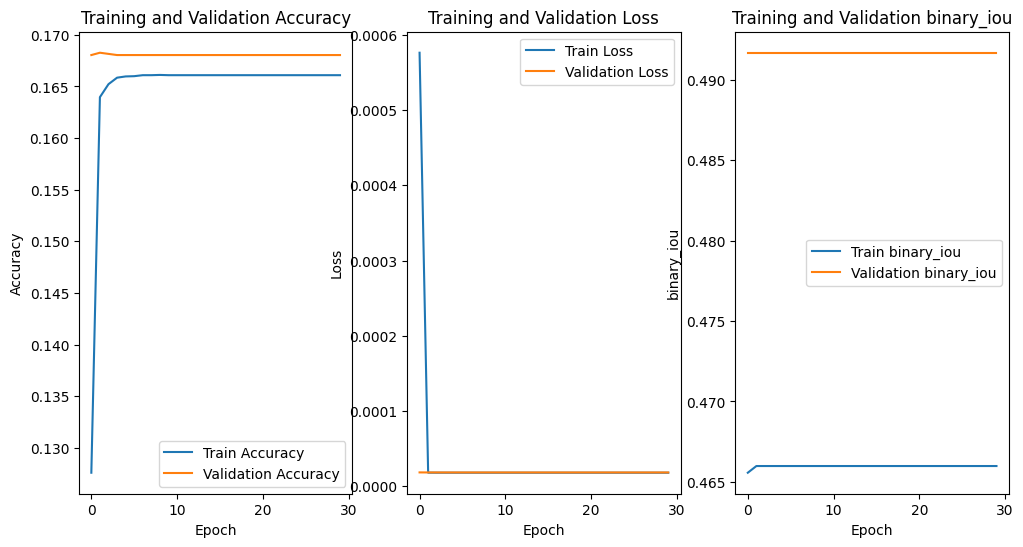

In [39]:
plot_acc_loss_custom(history_1)

### ResNet50

In [43]:
tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<Functional name=resnet50, built=True>

In [50]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the ResNet50 model without ImageNet weights (because of the 11 input channels)
base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 11))

# Initialize the first layer manually to accept 11 input channels
base_model.layers[0] = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape=(32, 32, 11))

# Add the classification layers (if needed)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)  # For binary classification

# Create the final model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 32, 32,    │          0 │ -                 │
│ (InputLayer)        │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38,    │          0 │ input_layer_9[0]… │
│ (ZeroPadding2D)     │ 11)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │     34,560 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 24,137,601 (92.08 MB)

 Trainable params: 24,084,481 (91.88 MB)

 Non-trainable params: 53,120 (207.50 KB)